# Regridding a NetCDF in Xarray format

In this example we will put worldwide wind speed data into a custom grid of our choice. We first read a NetCDF file, we store the variables in xarray format, we define a new mesh grid and we project the input variable into the new grid. At each step the old and the new gridded are plotted to spot the difference in the spatial distribution

We first load the necessary libraries

In [1]:
import xarray as xr
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

We use the wind speed data in NetCDF format

In [2]:
data_path = '../../DATA/wind.nc'
wind = xr.open_dataset(data_path)

The selected wind speed is the first time step of the UWND field

In [3]:
lats=wind.FNOCY.data
lons=wind.FNOCXN79_64.data
var=wind.UWND[0].data

We first look at how the input grid is. We create a grid with the original latitude and longitude

In [6]:
Yi = np.linspace(np.min(lats.data),float(np.max(lats.data)),len(lats))
Xi = np.linspace(np.min(lons.data),float(np.max(lons.data)),len(lons))
X, Y = np.meshgrid(Xi,Yi)

And we plot the variable based on this grid and the grid itself with dots

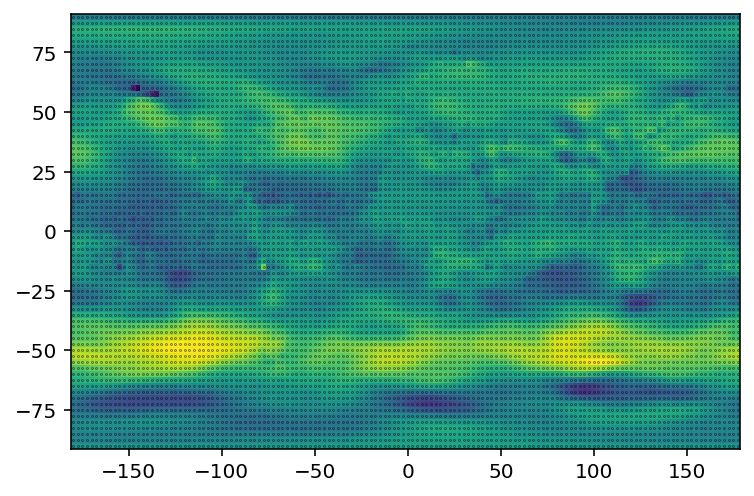

In [17]:
fig,ax = plt.subplots(dpi=144)
ax.pcolormesh(lons,lats,var);
ax.plot(X,Y,marker='o', color='k', linestyle='none',ms=.2);

Focusing on a particular random region, we see clearly the variable values associated with each grid cell 

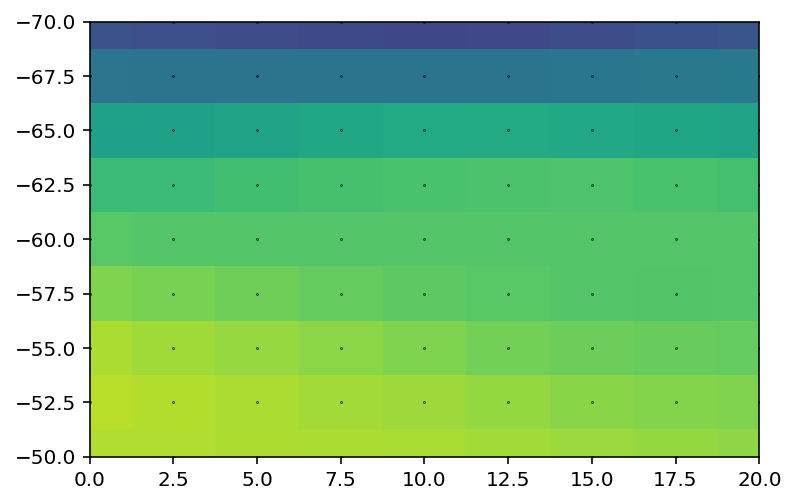

In [18]:
fig,ax = plt.subplots(dpi=144)
ax.set_ylim(-50,-70)
ax.set_xlim(0,20)
ax.pcolormesh(lons,lats,var);
ax.plot(X,Y,marker='o', color='k', linestyle='none',ms=.3);

We define the new regular mesh grid based on the existing lats and lons and adding a resolution two times the existing one. 

In [19]:
Yin = np.linspace(np.min(lats.data),float(np.max(lats.data)),2*len(lats))
Xin = np.linspace(np.min(lons.data),float(np.max(lons.data)),2*len(lons))
Xn, Yn = np.meshgrid(Xin,Yin)

We can now overlap the new gridpoints in blue onto the previous plot to stop the black new mesh grid. Horizontally and vertically we have now doubled the number of points. 

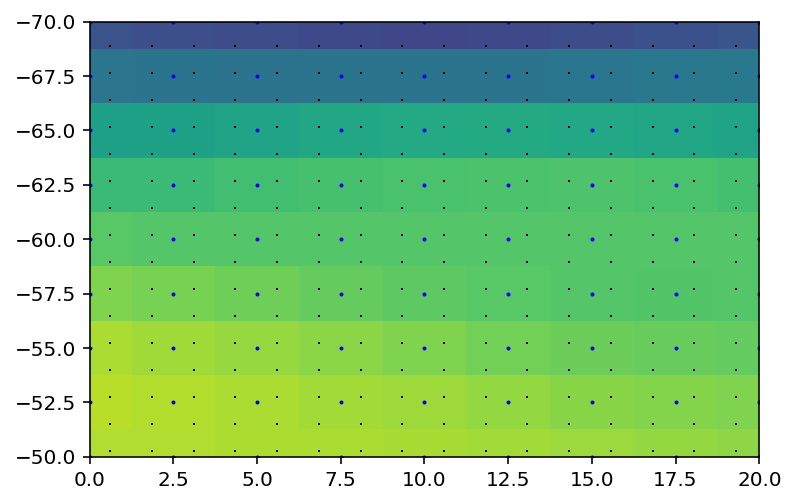

In [20]:
fig,ax = plt.subplots(dpi=144)
ax.set_ylim(-50,-70)
ax.set_xlim(0,20)
ax.pcolormesh(lons,lats,var);
ax.plot(X,Y,marker='o', color='b', linestyle='none',ms=1);
ax.plot(Xn,Yn, marker='+', color='black', linestyle='none',ms=1);

We now regrid the variable onto the new grid defined by Xn and Yn using the griddata( ) function and a linear interpolation between grid points. 

In [21]:
nvals = griddata((X.ravel(),Y.ravel()),var.ravel(),(Xn,Yn),method='linear')

The outcome is the regridded data: 

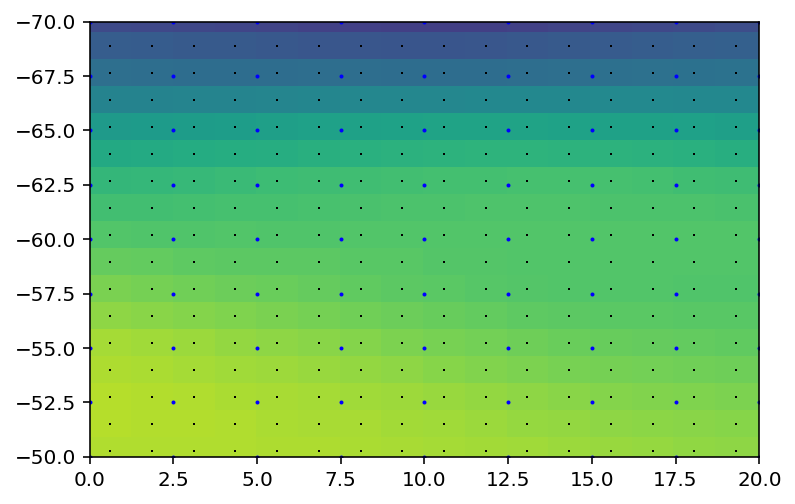

In [67]:
fig,ax = plt.subplots(dpi=144)
ax.set_ylim(-50,-70)
ax.set_xlim(0,20)
ax.pcolormesh(Xn,Yn,nvals);
ax.plot(X,Y,marker='o', color='b', linestyle='none',ms=1);
ax.plot(Xn,Yn, marker='+', color='black', linestyle='none',ms=1);